In [1084]:
%matplotlib notebook

## Rotationen in 3D
### Thomas Schmelzer



### Rotationen in 3D
* Die Rotationsmatrizen $\textrm{SO}(3)$
* Die Eulerachse 
* Die Quaternionen 

In [1085]:
import matplotlib.pyplot as plt
import numpy as np

def pp(ax, point, **kwargs):
    ax.plot([0, point[0]], [0,point[1]], [0, point[2]], **kwargs)
    
    

### Rotationsmatrizen $\textrm{SO}(3)$

$3 \times 3$ Matrizen, orthonormale Spalten und $\det(A) = 1$.
    
Fertig? Matrizen manchmal etwas unhandlich. $9$ Einträge, Fragen der Stabilität?


In [1086]:
# construct a random SO(3) matrix

import numpy as np

# We construct a random element in SO(3)
def rand_so3():
    A = np.random.randn(3,3)
    # normalize the first column
    A[:,0]=A[:,0]/np.linalg.norm(A[:,0], 2)
    # make the 2nd column orthogonal to first column
    A[:,1]=A[:,1] - np.dot(A[:,0], A[:,1])*A[:,0]
    # normalize the second column
    A[:,1]=A[:,1]/np.linalg.norm(A[:,1], 2)
    # The third column is just the cross product of the first two columns => det = 1
    A[:,2]=np.cross(A[:,0],A[:,1])
    return A

A = rand_so3()
print("Determinante von A: {0}".format(np.linalg.det(A)))
print("Check if columns are orthonormal")
print(np.linalg.norm(np.dot(A.T,A)-np.eye(3),'fro'))

Determinante von A: 0.9999999999999999
Check if columns are orthonormal
3.65043598952e-16


In [1087]:
from numpy.linalg import eig
import pandas as pd

for i in range(0,3):
    values, vectors = eig(rand_so3())
    d = dict()
    for j,value in enumerate(np.sort(values)):
        d[j] = {"Real": value.real, "Imag": value.imag, 
                "Abs": np.abs(value), "phi": np.angle(value, deg=True)}
    
    print("Eigenwerte von A:\n{0}\n".format(pd.DataFrame(d).transpose()[["Real","Imag","Abs","phi"]]))

Eigenwerte von A:
       Real      Imag  Abs         phi
0 -0.993287 -0.115676  1.0 -173.357393
1 -0.993287  0.115676  1.0  173.357393
2  1.000000  0.000000  1.0    0.000000

Eigenwerte von A:
      Real      Imag  Abs         phi
0 -0.58009 -0.814553  1.0 -125.456859
1 -0.58009  0.814553  1.0  125.456859
2  1.00000  0.000000  1.0    0.000000

Eigenwerte von A:
      Real      Imag  Abs         phi
0 -0.96866 -0.248392  1.0 -165.617633
1 -0.96866  0.248392  1.0  165.617633
2  1.00000  0.000000  1.0    0.000000



* Es gibt immer einen Eigenwert 1
* Eine reelle 3 x 3 Matrix hat immer mind. einen reellen Eigenwert
* Das charakteristische Polynom einer 3x3 Matrix hat den Grad 3. 
* Ein Polynom vom Grad 3 hat mind eine reelle Nullstelle (das ist nicht wahr fuer Polynome vom Grad 2,4,6,...)
* Was können Sie über die beiden anderen Eigenwerte sagen? 
* Was können Sie über das Produkt der Eigenwerte sagen?
* Was bedeutet es geometrisch so einen Eigenwert zu haben?

### Beobachtungen
* Es existiert ein Vektor x (reell), so dass A*x = x. Diese Vektor beschreibt die __Euler Achse__
* Die beiden anderen Eigenwerte sind $z$ und $\bar{z}$.

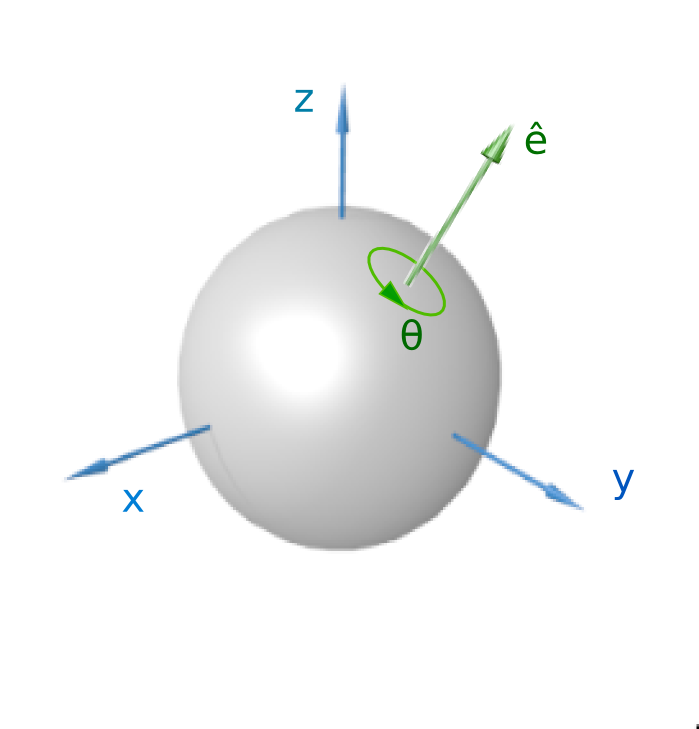

In [1088]:
from IPython.display import Image
Image("Euler_AxisAngle.png")

In [1089]:
def baseimage3(a):
    %matplotlib notebook
    #import matplotlib as mpl
    from mpl_toolkits.mplot3d import Axes3D
    #import numpy as np
    import matplotlib.pyplot as plt

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    from numpy.linalg import eig
    values, vectors = eig(A)
    i=np.argsort(values)
    values=values[i]
    euler=vectors[:,-1].real

    pp(ax, point=np.array([1,0,0]), color="b", linewidth=5)
    pp(ax, point=np.array([0,1,0]), color="r", linewidth=5)
    pp(ax, point=np.array([0,0,1]), color="g", linewidth=5)
    pp(ax, point=a[:,0], color="b", linewidth=5, linestyle="--")
    pp(ax, point=a[:,1], color="r", linewidth=5, linestyle="--")
    pp(ax, point=a[:,2], color="g", linewidth=5, linestyle="--")
    pp(ax, point=euler, color="k", linewidth=5, linestyle="--")
        
    plt.grid()
    plt.show()

<IPython.core.display.Javascript object>


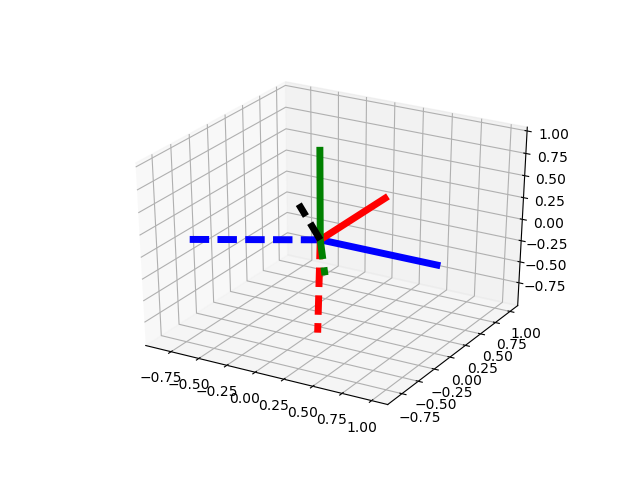

In [1090]:
baseimage3(A)

Jede Rotation in 3d ist also eine 2d Drehung um die Euler Achse. 
Eine solche Achse existiert immer! 

Punkte auf der Euler Achse bleiben unverändert.
Jeder Punkt liegt in einer Ebene orthogonal zur Euler Achse und bleibt auch nach der Rotation in dieser Ebene.

Die Berechnung der Euler Achse und des Drehwinkels $\varphi$ ist etwas technisch (ergo Hausaufgabe).

In [1091]:
# There are always 3 of them! 
# one always seems to be 1
# The other two eigenvalues are $z$ and $\bar{z}$
# Can we compute $\mathbf{A}*n=n$ without too much hassle?
# What's the interpretation of n?

#A^T*n = A^T*A*n=n
#(A^T - A)*n = 0
#B = A^T-A = 0

In [1092]:
A = rand_so3()

def euler(A, eps=1e-10):
    assert np.abs(np.linalg.det(A)-1) < eps, "Die Determinante der Matrix A ist {0}".format(np.linalg.det(A))
    assert np.linalg.norm(np.dot(A.T,A)-np.eye(3), 'fro') < eps, "Die Matrix A ist nicht orthonormal"
    assert A.shape==(3,3), "Die Matrix A ist nicht 3 x 3"

    theta = np.arccos((np.trace(A)-1)/2)
    e_1 = A[2,1]-A[1,2]
    e_2 = A[0,2]-A[2,0]
    e_3 = A[1,0]-A[0,1]
    
    n = np.array([e_1,e_2,e_3]) 
    
    assert np.abs(np.linalg.norm(n,2)-2*np.sin(theta)) < eps
    return n/np.linalg.norm(n,2), theta
    

axis, angle = euler(A)
# check if A*axis == n
print(np.linalg.norm(np.dot(A,axis)-axis, 2))
print(180*angle/np.pi)

1.59443642915e-16
148.8344162


* Die Idee ist es die Rotation als Paar aus Achse $(x_1, x_2, x_3)$ mit $x_1^2 + x_2^2 + x_3^2=1$ und Winkel $\varphi$ anzugeben. Das schaffen wir eben genau mit den Quaternionen uns insbesondere den Versoren:
\\[
q = \cos(\varphi/2) + \sin(\varphi/2) (ix_1 + jx_2 + kx_3)
\\]
* Ein Vektor $x \in \mathbb{R}^3$ kann mit der reinen Quaternion 
\\[
x_r = ix_1 + jx_2 + kx_3
\\]
identifiziert werden.
* Die Multiplikation der Quaternionen folgt
\\[
i^2 = j^2 = k^2 = ijk = -1
\\]
* Die Rotation ist dann der vektorwertige Teil der Quaternion
\\[
x' = q x_r \bar{q}
\\]


In [1093]:
import numpy as np

def fromSO3(A):
    axis, angle = euler(A)
    vector = np.sin(angle/2)*axis
    return Quaternion(np.array([np.cos(angle/2), vector[0], vector[1], vector[2]]))
    
def fromSO3_fast(A):
    q_r = 0.5*np.sqrt(1 + np.trace(A))
    q_i = (A[2,1]- A[1,2])/(4*q_r)
    q_j = (A[0,2]- A[2,0])/(4*q_r)
    q_k = (A[1,0]- A[0,1])/(4*q_r)
    return Quaternion(np.array([q_r, q_i, q_j, q_k]))

    
class Quaternion(object):
    def __init__(self, q):
        assert len(q) == 4
        self.__q = q
        # make the array immutable
        self.__q.flags.writeable = False
    
    @property
    def conjugate(self):
        return Quaternion(np.array([self.__q[0], -self.__q[1], -self.__q[2], -self.__q[3]]))
    
    @property
    def versor(self):
        return Quaternion(self.__q/self.norm)
    
    @property
    def norm(self):
        return np.linalg.norm(self.__q, 2)
    
    def __repr__(self):
        return "Q{0}".format(self.__q)
    
    def __mul__(self, other):
        if isinstance(other, Quaternion):
            w1, x1, y1, z1 = tuple(self.__q)
            w2, x2, y2, z2 = tuple(other.__q)

            w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
            x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
            y = w1 * y2 + y1 * w2 + z1 * x2 - x1 * z2
            z = w1 * z2 + z1 * w2 + x1 * y2 - y1 * x2
            return Quaternion(np.array([w, x, y, z]))
        else:
            raise NotImplementedError()
    
    def __rmul__(self, other):
        return Quaternion(other*self.__q)
    
    def __add__(self, other):
        return Quaternion(self.__q + other.__q)
    
    def rotate(self, x):
        # construct the pure quaternion
        z = Quaternion(np.array([0, x[0], x[1], x[2]]))
        assert np.abs(self.norm-1) < 1e-10, "The quaternion has to be a versor!"
        return (self*z*self.conjugate).vector
    
    @property
    def so3(self):    
        # there are less expensive formulas for this step. Howe
        return np.apply_along_axis(self.rotate, 0, np.eye(3))
        
    @property
    def vector(self):
        return self.__q[1:]
    
    @property
    def real(self):
        return self.__q[0]

In [1094]:
# compute a Matrix from SO3()
A = rand_so3()
print(A)
print(np.linalg.det(A))
print(np.linalg.norm(np.dot(A.T,A)-np.eye(3), 'fro'))

[[ 0.62484056  0.39270321 -0.67480254]
 [-0.7051909  -0.08707184 -0.70365068]
 [-0.33508218  0.9155341   0.22252471]]
1.0
3.32595119917e-16


In [1095]:
q1=fromSO3(A)
q2=fromSO3_fast(A)
print(q1)
print((q1+(-1*q2)).norm)
print(np.linalg.norm(A-q2.so3))


Q[ 0.66338025  0.61020236 -0.12802626 -0.41374992]
1.27192026216e-16
2.49800180541e-16


In [1096]:
print("Quaternion {0}".format(q1))
print("Norm       {0}".format(q1.norm))
print("Real       {0}".format(q1.real))
print("Vector     {0}".format(q1.vector))
print("Versor     {0}".format(q1.versor))
print("Conjugate  {0}".format(q1.conjugate))

Quaternion Q[ 0.66338025  0.61020236 -0.12802626 -0.41374992]
Norm       0.9999999999999999
Real       0.663380251909701
Vector     [ 0.61020236 -0.12802626 -0.41374992]
Versor     Q[ 0.66338025  0.61020236 -0.12802626 -0.41374992]
Conjugate  Q[ 0.66338025 -0.61020236  0.12802626  0.41374992]


In [1097]:
print("Quaternion Vector (Euler-Achse) {0}".format(q2.vector))
print("Und rotiert                     {0}".format(q2.rotate(x=q2.vector)))

Quaternion Vector (Euler-Achse) [ 0.61020236 -0.12802626 -0.41374992]
Und rotiert                     [ 0.61020236 -0.12802626 -0.41374992]


In [1098]:
print("Die Einheitsvektoren rotiert  \n{0}".format(q2.so3))
print("Die Rotationsmatrix           \n{0}".format(A))

Die Einheitsvektoren rotiert  
[[ 0.62484056  0.39270321 -0.67480254]
 [-0.7051909  -0.08707184 -0.70365068]
 [-0.33508218  0.9155341   0.22252471]]
Die Rotationsmatrix           
[[ 0.62484056  0.39270321 -0.67480254]
 [-0.7051909  -0.08707184 -0.70365068]
 [-0.33508218  0.9155341   0.22252471]]


### Aber warum?
* Die Rotation von (vielen) Punkten mittels Quaternionen ist verglichen mit Rotationsmatrizen teuer.
* Interessanter für Rotationen von Rotationen, numerisch stabiler...
* Interpolation von Quaternionen (SLERP)...

### Alternative Representations of SO(3) 
siehe https://github.com/moble/quaternion

Euler angles are pretty much the worst things ever and it makes me feel bad even supporting them. Quaternions are faster, more accurate, basically free of singularities, more intuitive, and generally easier to understand. You can work entirely without Euler angles (I certainly do). You absolutely never need them. 

Es gibt viele mögliche Representationen der Element von SO(3). Siehe https://en.wikipedia.org/wiki/Charts_on_SO(3)



Hausaufgabe: Sie fliegen von Biel direkt zum Nordpol. Was ist Ihr Längengrad? Sie überfliegen den Nordpol und nehmen geradeaus Kurs auf Hawaii... Sie zeichnen den Längengrad auf. Was passiert am Nordpol?

### Und SO(4), ...?

Sie können eine jede Rotation in 4d als Paar zweier Rotationen in 2d beschreiben. Gibt es eine Euler-Achse?
Gibt es eine Euler-Achse in 5d?


### Zusammenfassung 1:
* Komplexe Zahlen eng verwandt mit den Rotationsmatrizen SO(2).
* Quaternionen eng verwandt mit den Rotationsmatrizen SO(3).
* SO(2) eng verwandt mit SO(3), also Komplexe Zahlen eng verwandt mit Quaternionen.

### Zusammenfassung 2:
* Eine Rotation in 3D ist immer eine Rotation um eine feste Euler-Achse.
* Die Euler-Achse ist der Eigenvektor (zum Eigenwert 1.0) einer Matrix aus SO(3).
* Die Euler-Achse beschreibt den vektorwertigen Anteil der Quarternion.

### Zusammenfassung 3:
* Quarternionen insbesondere hilfreich bei vielen Rotationen weniger Punkte.
* Rotationsmatrizen hilfreich bei wenigen Rotationen vieler Punkte.
* Glückliches Leben auch ohne Quaternionen möglich, unmöglich aber ohne Lineare Algebra und Komplexe Zahlen.

In [1099]:
### Geht es auch mit weniger Mathematik?


    
    